# FBSP: Image processing - Introduction

#### Author: Nick Yao Larsen
#### Email: nylarsen@cfin.au.dk

In this tutorial, we'll delve into the basics of Image processing using Python.

All images will come from the ```scikit-image``` package and the link to the website is [here](https://scikit-image.org/docs/stable/user_guide/install.html)

If you dont have the skimage.data module installed then you need to run the following command:

```pip install scikit-image```

and

```pip install pooch```





## Exercise 1
1. Load the image ```camera``` from ```skimage.data``` module
2. Display the image in a figure 
3. Why does it have that strange color? (Find information about the colormap)
4. Visualize the image with a cmap ="gray"
5. What is the shape of the image?
6. Convert the image to double format using both img_as_float64() from the skimage.util module
7. Look at 1 pixel line of the image (row 100)
8. Grayscale image quantization
9. Downscale the image

## Exercise 2
1. Load the image ```retina``` from ```skimage.data``` module
2. What type of image is this?
3. Display the image in a figure 
4. Convert the image to a grayscale image
5. Zoom in to a specific Region of Interest (ROI)

## Exercise 3
1. The image ‘brain’ from the skimage.data module is a multiframe image. Load
frame number 5 of ‘brain’ into python.
2. How many different colors is represented in ‘brain’?
3. Create a subplot with two images. First image is the loaded frame number 5.
Second image is the loaded frame number 5, colorized with the predefined
colormap ‘jet’.

### Import libraries


In [1]:
import skimage as skimage
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Load the image camera from ```skimage.data``` module

In [2]:
# CODE HERE

In [2]:
#Load the data
img = skimage.data.camera()

### 1.2 Display the image in a figure

In [4]:
# CODE HERE

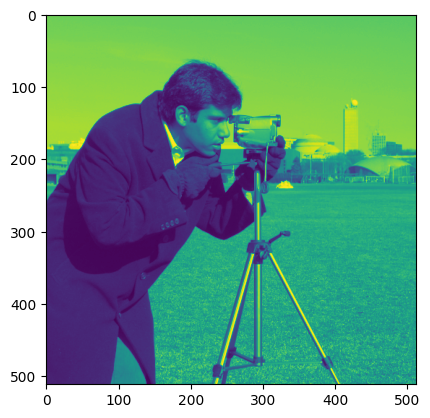

In [3]:
# Display the image 
plt.imshow(img)
plt.show()

### 1.3. Why does it have that strange color? (Find information about the colormap)
Hint: Look at colormap inside the library ```matplotlib``` [link](https://matplotlib.org/stable/api/cm_api.html)

You can a list of color maps from and see how they look like [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
```
from matplotlib import colormaps
list(colormaps)
```

You can plot the colormap use ```plt.cm.CHOSENCOLOR```

In [ ]:
## CODE HERE

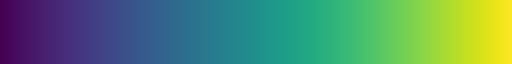

In [7]:
# Plot colormap
plt.cm.viridis

### 1.4. Visualize the image with different color
Visualize the image with a cmap by using a colors from [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

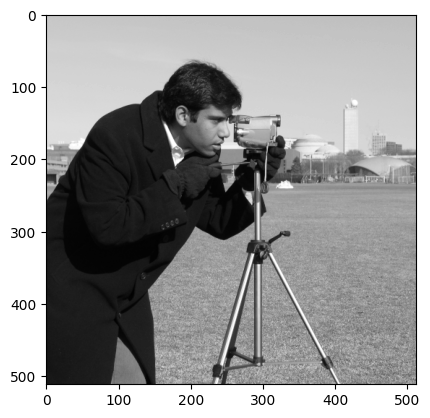

In [6]:
# Display the image 
plt.imshow(img,cmap="gray")
plt.show()

### 1.5 What is the shape of the image?

Hint use ```shape``` inside of ```numpy```

In [9]:
# CODE HERE

In [7]:
img.shape

(512, 512)

### 1.6 Convert the image to double format 
Plot both the original image and the new one converted to floats.\
**Question**: Are there any differences between them when we look at them?
 * Hint: Use both ```img_as_float64()``` from the ```skimage.util``` module ([link](https://scikit-image.org/docs/stable/api/skimage.util.html))

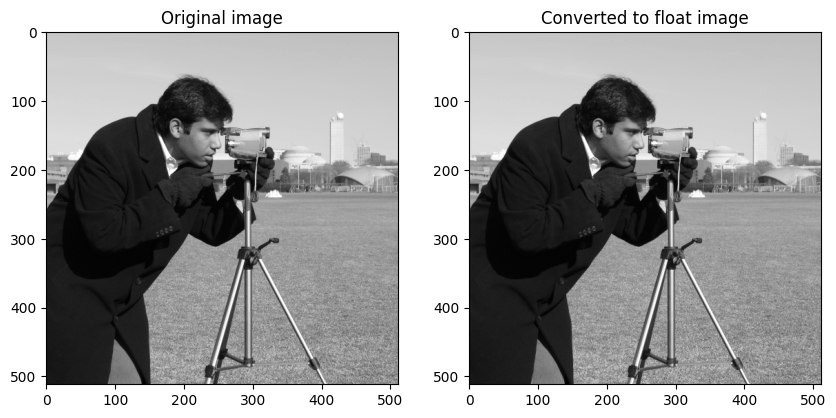

In [8]:
#Convert the image to double format using both img_as_float64() from the skimage.util module and 
img2 = skimage.util.img_as_float64(img)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original image")
#Figure 2
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Converted to float image")
plt.show()


### 1.7 Look at 1 pixel line of the image (row 100)
Get the image pixels from row 100 and get all column values.

This is done by indexing

Call the new variable ```row100``` 

In [12]:
# CODE HERE

In [13]:
row_num = 100
row100 =img[row_num,:]

Make a subplot of the original image and the 1D array like I have shown.

You can create a red line at the position of the row100 (just 1 line of code) using [axhlin](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)

In [14]:
# CODE HERE

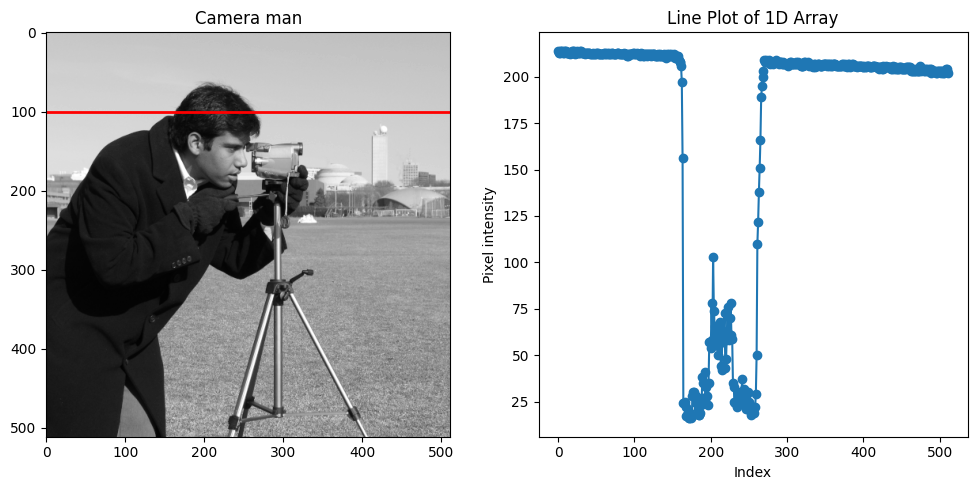

In [15]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Figure 1
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Camera man')
axes[0].axhline(y=row_num, color='red', linewidth=2)  # Add a red line at row 100
# Figure 2
axes[1].plot(row100, marker='o')
axes[1].set_title(f'Line Plot of 1D Array')
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Pixel intensity")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### 1.8 Grayscale image quantization of 4 colors
1. Normalize the intensity values to the range [0, 1]
2. Scale the normalized values to the desired color range (4 colors in this case)
3. Round the scaled values to represent discrete color levels (```int```)
4. Rescale the rounded values to bring them back to the original intensity range
    * You need to multiple the rounded value with the thing you want to scale back.
   
We set a limit of 4 colors, but try others as well :) 

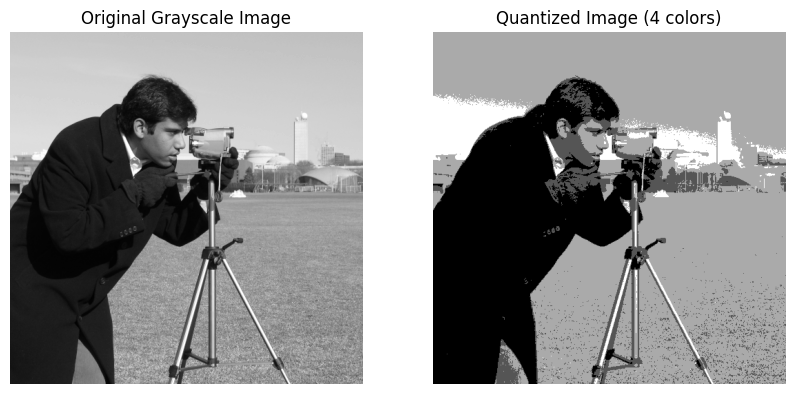

In [18]:
# Step 1: Normalize the intensity values to the range [0, 1]
normalized_image = img/255 # Fill in the code here

# Step 2: Scale the normalized values to the desired color range
# Hint the range of colors should be (n_colors-1)
n_colors = 4
scaled_values =  normalized_image*(n_colors-1)# Fill in the code here

# Step 3: Round the scaled values to represent discrete color levels
rounded_values =  np.round(scaled_values)# Fill in the code here

# Step 4: Rescale the rounded values to bring them back to the original intensity range
image_quantized =  rounded_values* (255/(n_colors-1))# Fill in the code here
#image_quantized = np.round(img / 255 * (n_colors - 1)) * (255 / (n_colors - 1))

# Display the original and quantized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Grayscale Image')

axes[1].imshow(image_quantized, cmap='gray')
axes[1].set_title(f'Quantized Image ({n_colors} colors)')

for ax in axes:
    ax.axis('off')

plt.show()


### 1.9 Downscale the image
Downscale the image with a ```scale_factor=0.10```

* Hint, look at ```skimage.transform``` 

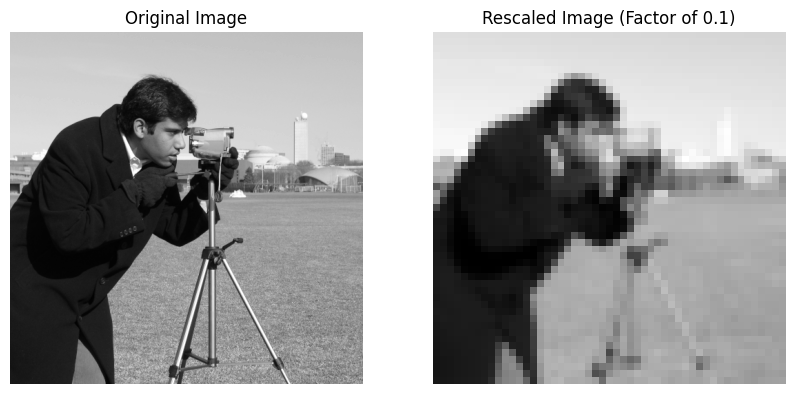

In [19]:
from skimage import transform

# Define the scale factor (change this value for different scaling)
scale_factor = 0.10  # 0.1 for downsampling (10%), 2.0 for upsampling (200%)

# Resize the image using skimage.transform.rescale
rescaled_image = transform.rescale(img, scale_factor)

# Display the original and rescaled images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img,cmap="gray")
axes[0].set_title('Original Image')

axes[1].imshow(rescaled_image[:,:],cmap="gray")
axes[1].set_title(f'Rescaled Image (Factor of {scale_factor})')

for ax in axes:
    ax.axis('off')

plt.show()


In [22]:
img.shape,rescaled_image.shape

((512, 512), (51, 51))

## Exercise 2
### 2.1 Load image
Load the image ```retina``` from ```skimage.data``` module (link in the beginning of the Notebook)

In [18]:
## CODE HERE

In [8]:
#Load the data
img = skimage.data.retina()

### 2.2. What type of image is this?
Hint you can tell by using ```shape```


In [20]:
#What type of image is this?
#RGB image of the retina
img.shape

(1411, 1411, 3)

### 2.3. Display the image in a figure 

In [21]:
# CODE HERE

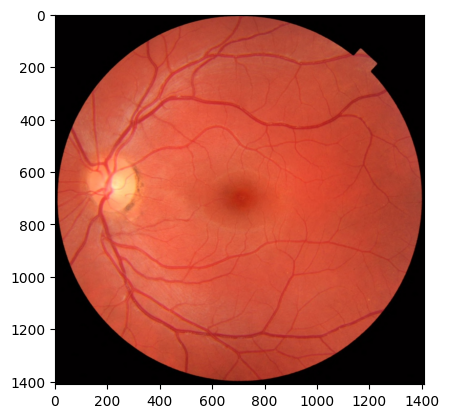

In [22]:
#Display the image in a figure
plt.imshow(img)
plt.show()

### 2.4. Convert the image to a grayscale image
Hint look at ```skimage.color``` [link](https://scikit-image.org/docs/stable/api/skimage.color.html)

In [23]:
# CODE HERE

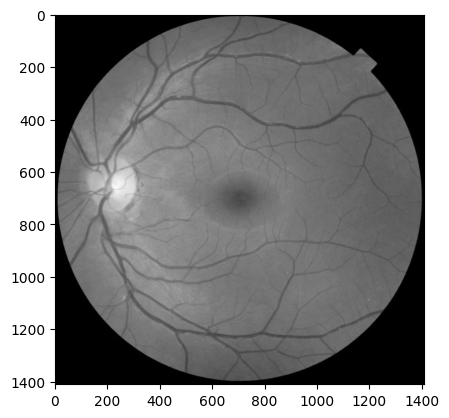

In [24]:
#Convert the image to a grayscale image
img2 = skimage.color.rgb2gray(img) 

#What happens now if you display the converted image?
#pyplot will use the default colormap and in order to plot it as grayscale, use the colormap 'gray'
plt.imshow(img2,cmap='gray')
plt.show()

### 2.5 Zoom in to a specific Region of Interest (ROI)
Try to make the same plot as me. 

It is not important that the values are exactly the same, just that is around the same area :) 

Hint** 
1. Use indexing to define the ROI
2. ```plt.gca()``` Make it possible to plot something on top of existing image/plot (it is not enough using ```plt.gca()``` You need to write ```plt.gca().xxxxxxxxx())
3. Look at ```plt.Rectangle``` [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
- Hint: when visualizing can either do ```axes[0].add_patch(plt.Rectangle```.... or ```plt.gca().add_patch(plt.Rectangle```

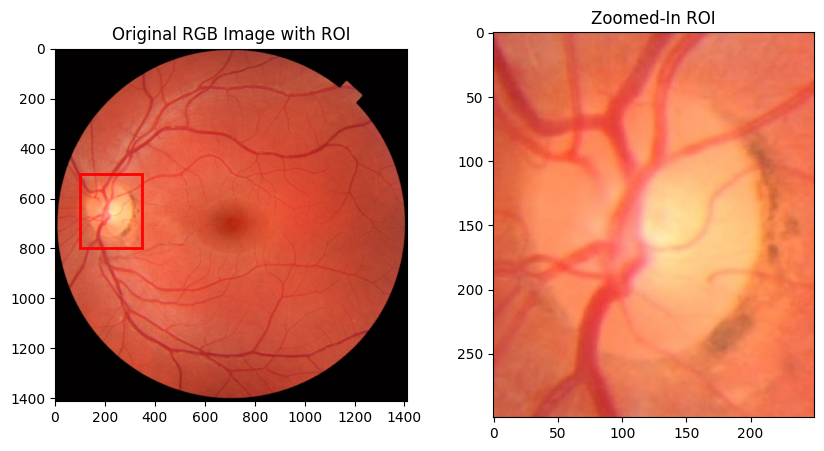

In [25]:
# Select a region of interest (ROI)
roi_start = (500, 100)  # Example coordinates (y1, x1)
roi_height, roi_width = 300, 250  # Example height and width
roi_end = (roi_start[0] + roi_height, roi_start[1] + roi_width)

# Select a region of interest (ROI)
roi = img[roi_start[0]:roi_end[0], roi_start[1]:roi_end[1]]  # Example coordinates (y1:y2, x1:x2)

# Display the original and rescaled images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title('Original RGB Image with ROI')
# Draw a rectangle around the ROI
axes[0].add_patch(plt.Rectangle(roi_start[::-1], roi_width, roi_height, linewidth=2, edgecolor='r', facecolor='none'))
#plt.gca().add_patch(plt.Rectangle(roi_start[::-1], roi_width, roi_height, linewidth=2, edgecolor='r', facecolor='none'))

axes[1].imshow(roi)
axes[1].set_title(f'Zoomed-In ROI')

plt.show()

## Exercise 3 

### 3.1 Load image
The image ```brain``` from the ```skimage.data``` module is a multiframe image. 
* Look at the same of the ```brain`` file
* Load frame number 5 of ‘brain’ into python.

In [26]:
#Load the image
img = skimage.data.brain()
img.shape

(10, 256, 256)

In [27]:
# Extract frame 5
imgf5 = img[4,:,:]

### 3.2 How many different colors is represented in frame 5 of ```brain```?
Hint, use ```numpy```

In [28]:
#How many different colors are represented in frame 5 of 'brain'?
np.unique(imgf5).size


210

### 3.3 Create a subplot with two images. 
* First image is the loaded frame number 5.
* Second image is the loaded frame number 5, colorized with the predefined
colormap ‘jet’.

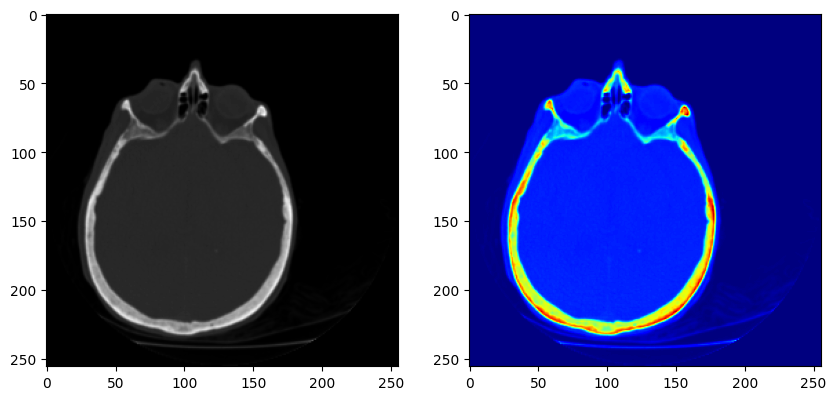

In [29]:
fig, axes = plt.subplots(1,2,figsize = (10,5))
# Figure 1
axes[0].imshow(imgf5,cmap='gray')
# Figure 2
axes[1].imshow(imgf5,cmap='jet')
plt.show()
